# Ch2: 2.3 Manifolds

Adopted from https://towardsdatascience.com/manifold-learning-t-sne-lle-isomap-made-easy-42cfd61f5183 and https://scikit-learn.org/stable/modules/manifold.html#manifold

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mnist = load_digits()

mnist.keys()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [5]:
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


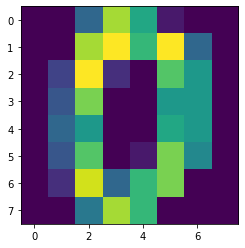

In [6]:
plt.imshow(mnist.images[0]);

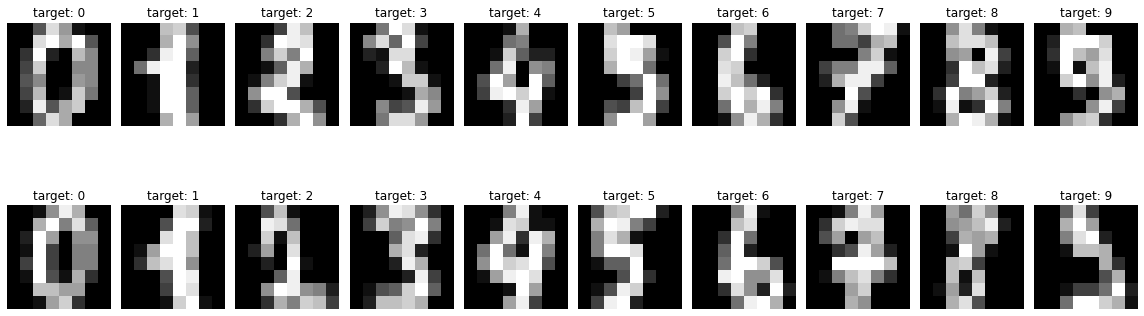

In [7]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [93]:
# Reading the data using pandas 
X = pd.DataFrame(mnist.data).to_numpy()
Y = pd.DataFrame(mnist.target).to_numpy().squeeze()
# print first five rows of df
print (X.shape)
print (Y.shape)

(1797, 64)
(1797,)


In [94]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
 
X = StandardScaler().fit_transform(X)
print(X.shape)

(1797, 64)


In [95]:
from sklearn.manifold import MDS
from time import time
start= time()
mds = MDS(n_components=2)
X_mds_trans = mds.fit_transform(X)
mds_learnTime= time()-start

In [96]:
from sklearn.manifold import Isomap

start= time()
embedding = Isomap(n_components=2) #resulting data has 2 dimensions, 'components'
X_iso_trans = embedding.fit_transform(X) #fit model and transform
iso_learnTime= time()-start

In [97]:
from sklearn.manifold import LocallyLinearEmbedding
start= time()
embedding = LocallyLinearEmbedding(n_components=2) #result has 2 dimensions
X_lle_trans = embedding.fit_transform(X)
lle_learnTime= time()-start

In [98]:
from sklearn.manifold import TSNE
start= time()
embedding = TSNE(n_components=2) #result has 2 features
# could add random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

X_tnse_trans = embedding.fit_transform(X)
tsne_learnTime= time()-start

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [130]:
from sklearn.manifold import  SpectralEmbedding
start= time()
embedding = SpectralEmbedding(n_components=2) #result has 2 features
X_spec_trans = embedding.fit_transform(X)
spec_learnTime= time()-start

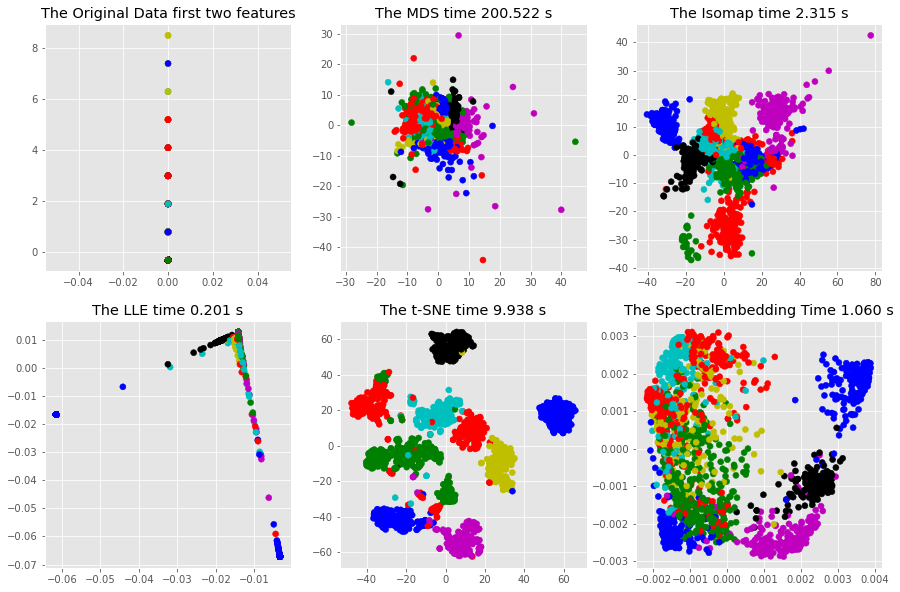

In [139]:
import matplotlib.pyplot as plt
import numpy as np

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
label_color = [colors[l] for l in Y]

# Comparing before and after MDS, for the first two features only
fig = plt.figure( figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(X[:,0],X[:,1], marker='o', c=label_color)
plt.title("The Original Data first two features")

plt.subplot(2,3,2)
plt.scatter(X_mds_trans[:,0],X_mds_trans[:,1], marker='o', c=label_color)
plt.title("The MDS time %5.3f s" %mds_learnTime)

# Comparing before and after Isomap, for the first two features only

plt.subplot(2,3,3)
plt.scatter(X_iso_trans[:,0],X_iso_trans[:,1], marker='o', c=label_color)
plt.title("The Isomap time %5.3f s" %iso_learnTime)


# Comparing before and after LLE, for the first two features only
plt.subplot(2,3,4)
plt.scatter(X_lle_trans[:,0],X_lle_trans[:,1], marker='o', c=label_color)
plt.title("The LLE time %5.3f s" %lle_learnTime)

# Comparing before and after t-SNE, for the first two features only

plt.subplot(2,3,5)
plt.scatter(X_tnse_trans[:,0],X_tnse_trans[:,1], marker='o', c=label_color)
plt.title("The t-SNE time %5.3f s" %tsne_learnTime)


plt.subplot(2,3,6)
plt.scatter(X_spec_trans[:,0],X_spec_trans[:,1], marker='o', c=label_color)
plt.title("The SpectralEmbedding Time %5.3f s" % spec_learnTime)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


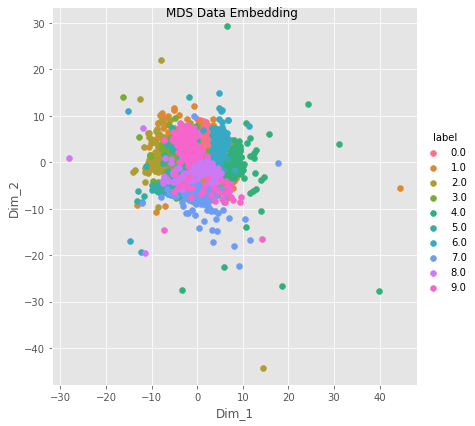

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


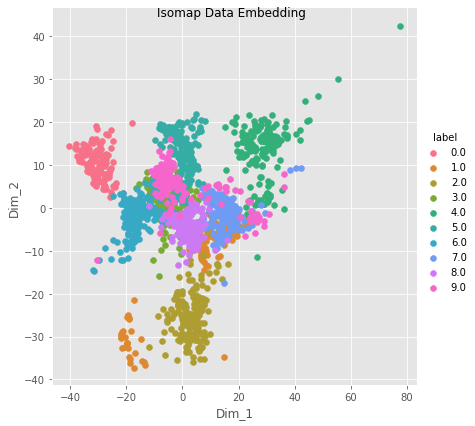

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


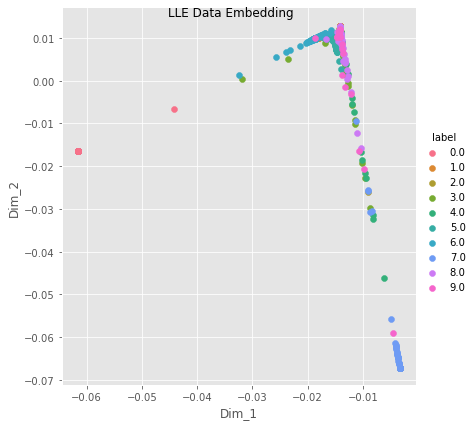

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


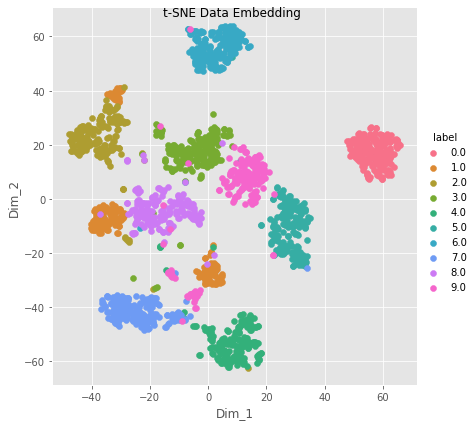

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


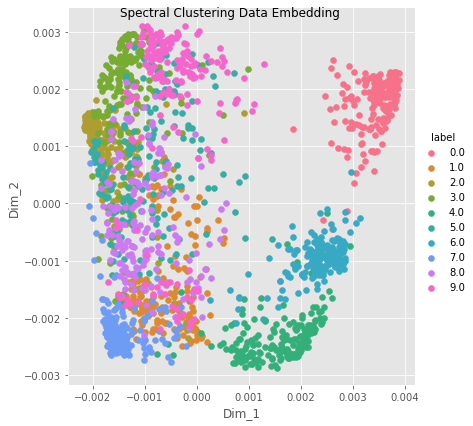

In [140]:
import seaborn as sn
 
# creating a new data frame from the embedding created by each algorithm
mds_data = np.vstack((X_mds_trans.T, Y)).T
mds_df = pd.DataFrame(data = mds_data, columns =("Dim_1", "Dim_2", "label"))

iso_data = np.vstack((X_iso_trans.T, Y)).T
iso_df = pd.DataFrame(data = iso_data, columns =("Dim_1", "Dim_2", "label"))

lle_data = np.vstack((X_lle_trans.T, Y)).T
lle_df = pd.DataFrame(data = lle_data, columns =("Dim_1", "Dim_2", "label"))

tsne_data = np.vstack((X_tnse_trans.T, Y)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

spec_data = np.vstack((X_spec_trans.T, Y)).T
spec_df = pd.DataFrame(data = spec_data, columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne

g = sn.FacetGrid(mds_df, hue ="label", size = 6)
g.map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
g.fig.suptitle("MDS Data Embedding") 
plt.show()

g = sn.FacetGrid(iso_df, hue ="label", size = 6)
g.map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
g.fig.suptitle("Isomap Data Embedding") 
plt.show()

g = sn.FacetGrid(lle_df, hue ="label", size = 6)
g.map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
g.fig.suptitle("LLE Data Embedding") 
plt.show()

g = sn.FacetGrid(tsne_df, hue ="label", size = 6)
g.map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
g.fig.suptitle("t-SNE Data Embedding") 
plt.show()

g = sn.FacetGrid(spec_df, hue ="label", size = 6)
g.map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
g.fig.suptitle("Spectral Clustering Data Embedding") 
plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
pca_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("PCA RMSE " + str(pca_RMSE))

PCA RMSE3.506343457855269


In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
ldaComponents = lda.fit_transform(X, Y)


X_train, X_test, y_train, y_test = train_test_split(ldaComponents, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
lda_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("LDA RMSE " + str(lda_RMSE))

LDA RMSE3.1220541670865067


In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as QDA
qda = QDA(n_components=2)
qdaComponents = qda.fit_transform(X, Y)


X_train, X_test, y_train, y_test = train_test_split(qdaComponents, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
qda_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("QDA RMSE " + str(qda_RMSE))

QDA RMSE3.1220541670865067


In [ ]:
qda.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(mds_df, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
mds_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("MDS RMSE " + str(mds_RMSE))

MDS RMSE1.1486707293408518


In [116]:
X_train, X_test, y_train, y_test = train_test_split(iso_df, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
iso_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("Isomap RMSE " + str(iso_RMSE))

Isomap RMSE0.8944271909999159


In [117]:
X_train, X_test, y_train, y_test = train_test_split(lle_df, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
lle_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("LLE RMSE " + str(lle_RMSE))

LLE RMSE0.4654746681256314


In [118]:
X_train, X_test, y_train, y_test = train_test_split(tsne_df, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
tnse_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("t-SNE RMSE " + str(tnse_RMSE))

t-SNE RMSE0.3689323936863109


In [141]:
X_train, X_test, y_train, y_test = train_test_split(spec_df, Y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_p = classifier.predict(X_test)
spec_RMSE = math.sqrt(np.square(np.subtract(y_test,y_p)).mean() )
print ("Spec Clustering RMSE " + str(spec_RMSE))

Spec Clustering RMSE 0.9204467514322717


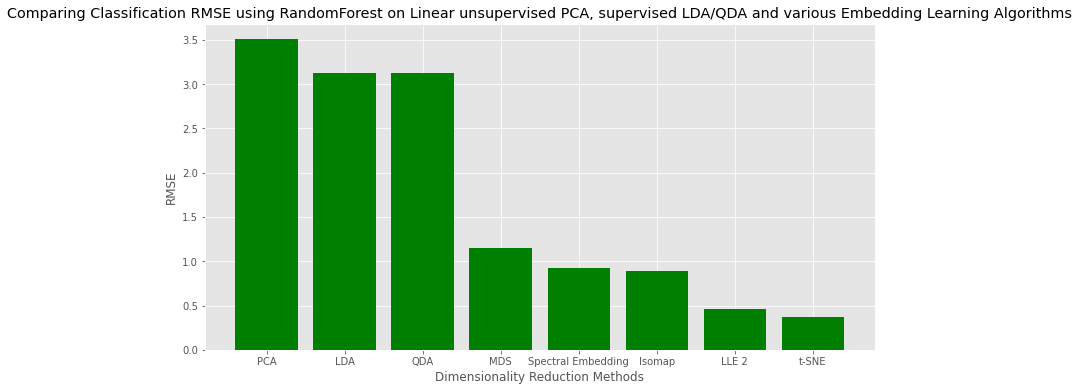

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure( figsize=(12,6))
plt.style.use('ggplot')

x = ['PCA', 'LDA', 'QDA', 'MDS', 'Spectral Embedding', 'Isomap', 'LLE 2', 't-SNE']
MSE = [pca_RMSE, lda_RMSE, qda_RMSE, mds_RMSE, spec_RMSE, iso_RMSE, lle_RMSE, tnse_RMSE]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, MSE, color='green')
plt.xlabel("Dimensionality Reduction Methods")
plt.ylabel("RMSE")
plt.title("Comparing Classification RMSE using RandomForest on Linear unsupervised PCA, supervised LDA/QDA and various Embedding Learning Algorithms")

plt.xticks(x_pos, x)

plt.show()

## There is room for improvement for a fair comparison